In [1]:
import os, sys
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
sys.path.append('../readmaroc')
import seaborn as sns
from maroc_data_new_tboard import MarocData
from functools import partial
from scipy.stats import norm
from operator import add
from functools import reduce 
import operator
import json
input_dat1 = '../readmaroc/data/farm/Run000109218.dat'
input_dat2 = '../readmaroc/data/farm/Run000133072.dat'
marocdata1 = MarocData(input_dat1)
marocdata2 = MarocData(input_dat2)

In [2]:
marocdata = marocdata2

In [ ]:
max_evt = marocdata.max_evt
print(max_evt)

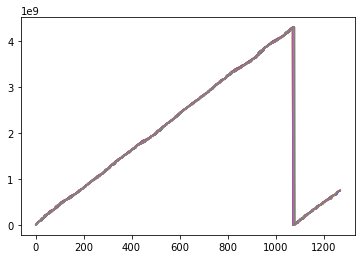

In [4]:
for board in marocdata.active_boards:
    evt_ids =[evt for evt, _ in marocdata.get_board(board).events.items()]
    ts =[event.TS for _, event in marocdata.get_board(board).events.items()]
    plt.plot(evt_ids, ts)
plt.show()

In [10]:
ts_8_orig= np.asarray([event.TS for _, event in marocdata.get_board(8).events.items()])
ts_9_orig=np.asarray([event.TS for _, event in marocdata.get_board(9).events.items()])

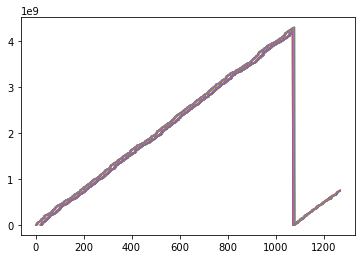

In [6]:
for board in marocdata.active_boards:
    evt_ids =[evt for evt, _ in marocdata.get_board(board).timestamps.items()]
    ts =[timestamp for _, timestamp in marocdata.get_board(board).timestamps.items()]
    plt.plot(evt_ids, ts)
plt.show()

In [17]:
ts_8_correct = np.asarray([timestamp for _, timestamp in marocdata.get_board(8).timestamps.items()])
ts_9_correct = np.asarray([timestamp for _, timestamp in marocdata.get_board(9).timestamps.items()])

In [30]:
marocdata.fix_p1(debug=False)

In [31]:
ts_8_correct_after_fixp1=[timestamp for _, timestamp in marocdata.get_board(8).timestamps.items()]
ts_9_correct_after_fixp1=[timestamp for _, timestamp in marocdata.get_board(9).timestamps.items()]

In [28]:
ts_8_correct ==ts_8_correct_after_fixp1

True

In [29]:
ts_9_correct ==ts_9_correct_after_fixp1

True

In [30]:
ts_8_correct

[0,
 0,
 4267169,
 4398200,
 4956393,
 5390720,
 6639170,
 8690635,
 8879937,
 12688947,
 12838105,
 12888138,
 14338728,
 25186962,
 25527083,
 30977893,
 32033213,
 35165860,
 37567628,
 38348343,
 39142382,
 40109070,
 43528961,
 44521007,
 44770568,
 46443990,
 47647311,
 49429186,
 51899205,
 52225042,
 52957601,
 56026134,
 56259984,
 56524644,
 59541480,
 63597601,
 66329106,
 66719948,
 76283147,
 76920639,
 77522019,
 78148368,
 80151923,
 82954110,
 83339009,
 87492287,
 90750764,
 93303436,
 93792001,
 97818036,
 100345509,
 103869840,
 105502970,
 105617981,
 110800831,
 118700406,
 118795599,
 119229008,
 120879007,
 121394555,
 121687064,
 124641621,
 127551431,
 128338871,
 129880391,
 130815845,
 132306849,
 133784260,
 136577167,
 138788958,
 138927885,
 142581259,
 145496268,
 147248663,
 148530302,
 149757900,
 149820436,
 150235810,
 150804251,
 151968708,
 152705319,
 154700401,
 161052251,
 161109877,
 164889277,
 166645867,
 171593540,
 171860883,
 171988235,
 17

In [31]:
ts_9_correct

[0,
 0,
 4267169,
 4398199,
 4956392,
 5390719,
 6639170,
 8690635,
 8879936,
 12688947,
 12838105,
 12888137,
 14338727,
 25186962,
 25527082,
 30977893,
 32033213,
 35165859,
 37567627,
 38348342,
 39142382,
 40109069,
 43528961,
 44521007,
 44770568,
 46443989,
 47647310,
 49429185,
 51899205,
 52225042,
 52957601,
 56026134,
 56259984,
 56524643,
 59541480,
 63597600,
 66329106,
 66719947,
 76283147,
 76920639,
 77522019,
 78148368,
 80151923,
 82954110,
 83339008,
 87492287,
 90750763,
 93303436,
 93792000,
 97818036,
 100345509,
 103869840,
 105502970,
 105617981,
 110800831,
 118700406,
 118795599,
 119229008,
 120879007,
 121394555,
 121687064,
 124641621,
 127551430,
 128338871,
 129880391,
 130815845,
 132306849,
 133784260,
 136577167,
 138788958,
 138927884,
 142581259,
 145496268,
 147248663,
 148530302,
 149757900,
 149820436,
 150235809,
 150804251,
 151968708,
 152705318,
 154700401,
 161052250,
 161109877,
 164889276,
 166645867,
 171593539,
 171860883,
 171988235,
 17

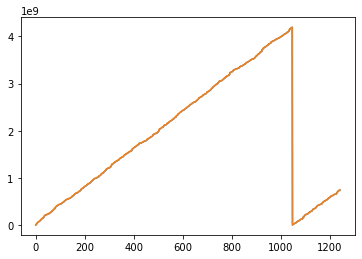

In [10]:
plt.plot(np.arange(max_evt-1), ts_8_correct)
plt.plot(np.arange(max_evt), ts_9_correct)

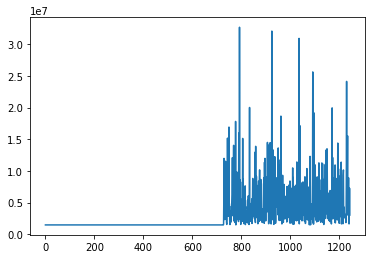

In [13]:
plt.plot(np.arange(1243), ts_8_orig-ts_9_orig[:-1])

In [16]:
print(ts_8_orig[:10], ts_9_orig[:10], ts_8_orig[:10]-ts_9_orig[:10])

[ 96776127 106434559 107928649 115860026 118490553 125931734 139697430
 146602867 147672710 150798832] [ 95306282 104964715 106458805 114390182 117020709 124461889 138227586
 145133023 146202866 149328987] [1469845 1469844 1469844 1469844 1469844 1469845 1469844 1469844 1469844
 1469845]


In [18]:
print(ts_8_correct[:10], ts_9_correct[:10], ts_8_correct[:10]-ts_9_correct[:10])

[       0  9658432 11152522 19083899 21714426 29155607 42921303 49826740
 50896583 54022705] [       0  9658433 11152523 19083900 21714427 29155607 42921304 49826741
 50896584 54022705] [                   0 18446744073709551615 18446744073709551615
 18446744073709551615 18446744073709551615                    0
 18446744073709551615 18446744073709551615 18446744073709551615
                    0]
